# Homework 1
Author: Rahul Bhatia (rb3318)

In [326]:
import seaborn as sns


## Problem 2

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import stats

In [28]:
r_samples = np.round(np.linspace(0.001, 0.999, 998), 3)
r_samples[:10]

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 ])

In [29]:
observed = [
    (-3.3, -2.6), (0.1,-0.2), (-1.1,-1.5), (2.7,1.5), (2.0,1.9), (-0.4,-0.3)
]

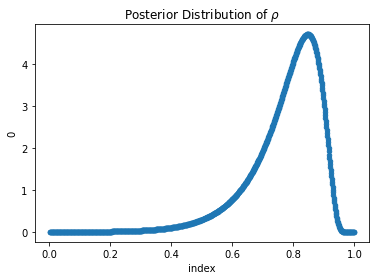

In [104]:
likelihood = {}
for r in r_samples:
    likelihood[r] = np.prod([
        stats.multivariate_normal(mean=[0, 0], cov=[[1, r], [r, 1]]).pdf([x, y])
        for (x, y) in observed
    ])
likelihood_srs = pd.Series(likelihood)
prob = likelihood_srs / np.sum(likelihood_srs * 0.001)
prob.reset_index().plot(kind='scatter', x='index', y=0, title=r"Posterior Distribution of $\rho$");

In [114]:
print(f"Posterior Mean: {np.mean(prob.index * prob) :.3f}")
print(f"Posterior Median: {(0.001 * prob.cumsum() > 0.5).idxmax()}")
print(f"Posterior Mode: {prob.idxmax()}")

Posterior Mean: 0.777
Posterior Median: 0.8
Posterior Mode: 0.847


In [117]:
print(f"Credible Set [{(0.001 * prob.cumsum() > 0.025).idxmax()}, {(0.001 * prob.cumsum() > 0.975).idxmax()}]")


Credible Set [0.493, 0.918]


## Problem 3

### Part B

In [63]:
stats.beta(3, 9).interval(0.95)

(0.06021773417290666, 0.5177558523601726)

### Part C

In [144]:
posterior_theta_samples = stats.beta(3, 9).rvs(1000)
posterior_predictions = [1 - stats.binom(10, post_theta).pmf(0) for post_theta in posterior_theta_samples]
posterior_prediction = np.mean(posterior_predictions)
print(f"{posterior_prediction:.4f}")

0.8816


## Problem 4

### Part A

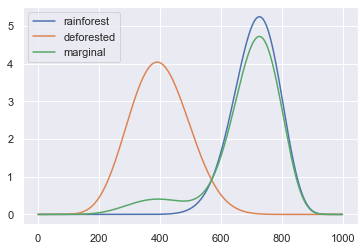

In [327]:
df = pd.DataFrame({
    "rainforest": stats.beta(25, 10).pdf(np.linspace(0, 1, 1000)),
    "deforested": stats.beta(10, 15).pdf(np.linspace(0, 1, 1000)),
})
df['marginal'] = 0.9 * df.rainforest + 0.1 * df.deforested
df.plot();

### Part C

In [333]:
stats.beta(10, 15).pdf(0.001)

1.9339761783581167e-20

In [340]:
ndvi_samples = np.linspace(0.001, 0.999, 998)
dist = pd.DataFrame({
    "ndvi": ndvi_samples,
    "pdf": [((0.1 * stats.beta(10, 15).pdf(ndvi_sample)) / 
         (0.1 * stats.beta(10, 15).pdf(ndvi_sample) + 0.9 * stats.beta(25, 10).pdf(ndvi_sample)))
         for ndvi_sample in ndvi_samples]
})

Text(0, 0.5, 'Probability')

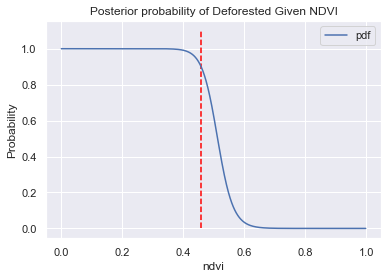

In [354]:
dist.set_index('ndvi').plot();
plt.vlines(x=(dist.set_index('ndvi').pdf < 0.9).idxmax(), ymin=0, ymax=1.1, linestyles='dashed', colors='red')
plt.title("Posterior probability of Deforested Given NDVI")
plt.ylabel("Probability")

In [342]:
(dist.set_index('ndvi').pdf < 0.9).idxmax()

0.45945937813440324

## Problem 5

### Part A

In [156]:
(stats.poisson(3.24).pmf(3)) / (stats.poisson(3.24).pmf(3) + stats.poisson(0.23).pmf(3))

0.9927949923563806

### Part C

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


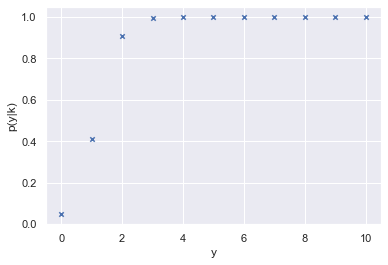

In [182]:
def p_h_given_k(k):
    return (stats.poisson(3.24).pmf(k)) / (stats.poisson(3.24).pmf(k) + stats.poisson(0.23).pmf(k))

df = pd.DataFrame([p_h_given_k(x) for x in range(11)]).reset_index().rename(columns={"index": "y", 0: "p(y|k)"})
df.plot(kind='scatter', x='y', y='p(y|k)', marker='x');

## Problem 6
### Part B

In [315]:
players = pd.DataFrame([
    {"player": "Russell Westbrook", "makes": 64, "attempts": 75, "overall": 0.845},
    {"player": "James Harden", "makes": 72, "attempts": 95, "overall": 0.847},
    {"player": "Kawhi Leonard", "makes": 55, "attempts": 63, "overall": 0.88},
    {"player": "LeBron James", "makes": 27, "attempts": 39, "overall": 0.674},
    {"player": "Isaiah Thomas", "makes": 75, "attempts": 83, "overall": 0.909},
    {"player": "Stephen Curry", "makes": 24, "attempts": 26, "overall": 0.898},
    {"player": "Giannis Antetokounmpo", "makes": 28, "attempts": 41, "overall": 0.770},
    {"player": "John Wall", "makes": 66, "attempts": 82, "overall": 0.801},
    {"player": "Anthony Davis", "makes": 50, "attempts": 54, "overall": 0.802},
    {"player": "Kevin Durant", "makes": 13, "attempts": 16, "overall": 0.875},
])

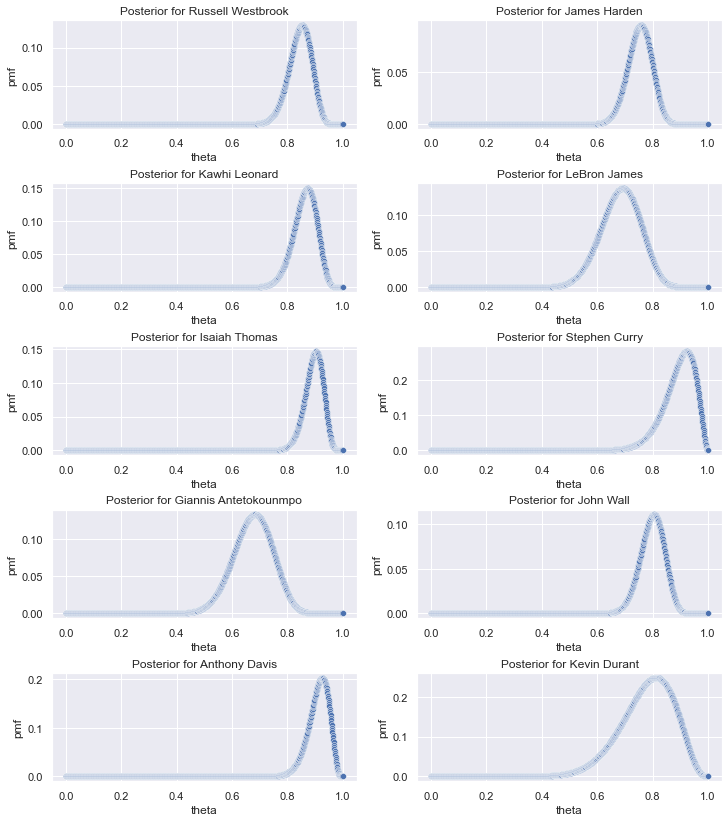

In [310]:
%matplotlib inline 
def get_distribution(makes, attempts):
    theta_range = np.linspace(0.001, 1, 999)
    df = pd.DataFrame([
        {"theta": theta, "pmf": stats.binom(attempts, theta).pmf(makes)} 
        for theta in theta_range])
    return df

def plot_posterior(player, makes, attempts, ax):
    df = get_distribution(makes, attempts)
    sns.scatterplot(x='theta', y='pmf', markers='x', data=df, ax=ax)
    ax.set_title(f"Posterior for {player}")
    
fig, ax = plt.subplots(5, 2, figsize=(12, 14))
fig.subplots_adjust(hspace=0.5)
ax = np.ravel(ax)
for i in range(players.shape[0]):
    plot_posterior(ax=ax[i], player=players.iloc[i]['player'], makes=players.iloc[i]['makes'], attempts=players.iloc[i]['attempts'])

### Part C

In [311]:
def summarize_posterior(makes, attempts):
    theta_range = np.linspace(0.001, 1, 999)
    df = pd.DataFrame([
        {"theta": theta, "pmf": stats.binom(attempts, theta).pmf(makes)} 
        for theta in theta_range])
    df['pmf'] = df['pmf'] / df['pmf'].sum()
    return {
        q: (df.iloc[(df.pmf.cumsum() > q).idxmax()]['theta'])
        for q in [0.025, 0.25, 0.5, 0.75, 0.975]
    }

summary = pd.DataFrame(
    [{"player": row.player, **summarize_posterior(row.makes, row.attempts)} 
     for index, row in players.iterrows()])
summary

player     0.025      0.25       0.5      0.75     0.975
0      Russell Westbrook  0.755756  0.817818  0.846847  0.873874  0.915916
1           James Harden  0.662662  0.723723  0.754755  0.782783  0.832833
2          Kawhi Leonard  0.768769  0.834835  0.864865  0.891892  0.933934
3           LeBron James  0.534534  0.635635  0.685685  0.733733  0.813814
4          Isaiah Thomas  0.820821  0.873874  0.896897  0.917918  0.949950
5          Stephen Curry  0.756757  0.859860  0.901902  0.935936  0.975976
6  Giannis Antetokounmpo  0.529529  0.627627  0.676676  0.723723  0.804805
7              John Wall  0.705705  0.769770  0.799800  0.828829  0.875876
8          Anthony Davis  0.823824  0.887888  0.915916  0.937938  0.969970
9           Kevin Durant  0.565565  0.717717  0.787788  0.848849  0.931932

In [324]:
(summary
    .join(players.set_index('player'), how='left', on='player')
    .assign(clutch_shooter=lambda df: df[0.5] - df.overall)
    .style
    .background_gradient(subset=['clutch_shooter']))